# Project Python For Data Science: AustoAutomobile Data Analysis

# Context

Analysts are required to explore data and reflect on the insights. Clear writing skill is an integral part of a good report. Note that the explanations must be such that readers with minimum knowledge of analytics is able to grasp the insight.
Austo Motor Company is a leading car manufacturer specializing in SUV, Sedan, and Hatchback models. In its recent board meeting, concerns were raised by the members on the efficiency of the marketing campaign currently being used. The board decides to rope in an analytics professional to improve the existing campaign.

# Objective


They want to analyze the data to get a fair idea about the demand of customers which will help them in enhancing their customer experience. Suppose you are a Data Scientist at the company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

# Key Questions

    1. Do men tend to prefer SUVs more compared to women? 
    2. What is the likelihood of a salaried person buying a Sedan? 
    3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale? 
    4. How does the the amount spent on purchasing automobiles vary by gender? 
    5. How much money was spent on purchasing automobiles by individuals who took a personal loan? 
    6. How does having a working partner influence the purchase of higher-priced cars?

# Data Description

* Age: The age of the individual in years.
* Gender: The gender of the individual, categorized as male or female.
* Profession: The occupation or profession of the individual.
* Marital_status: The marital status of the individual, such as married &, single
* Education: The educational qualification of the individual Graduate and Post Graduate
* No_of_Dependents: The number of dependents (e.g., children, elderly parents) that the individual supports financially.
* Personal_loan: A binary variable indicating whether the individual has taken a personal loan "Yes" or "No"
* House_loan: A binary variable indicating whether the individual has taken a housing loan "Yes" or "No"
* Partner_working: A binary variable indicating whether the individual's partner is employed "Yes" or "No"
* Salary: The individual's salary or income.
* Partner_salary: The salary or income of the individual's partner, if applicable.
* Total_salary: The total combined salary of the individual and their partner (if applicable).
* Price: The price of a product or service.
* Make: The type of automobile

# Importing the necessary libraries

In [1]:
# libraries for data manipulation
import pandas as pd
import numpy as np

# libraries for data visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [2]:
#Read the data
df= pd.read_csv('C:/Users/HP/Downloads/austo_automobile.csv')

# Data Overview
The initial steps to get an overview of any dataset is to

* Observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not.
* Get information about the number of rows and columns in the dataset.
* Find out the data types of the columns to ensure the data is stored in the preferred format and the value of each property is as expected.
* Check the statistical summary of the dataset to get an overview of the numerical columns of the data. 

# Displaying the first few rows of the dataset

In [3]:
#Returns the first 5 rows
df.head()

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
0,53,Male,Business,Married,Post Graduate,4,No,No,Yes,99300,70700.0,170000,61000,SUV
1,53,Femal,Salaried,Married,Post Graduate,4,Yes,No,Yes,95500,70300.0,165800,61000,SUV
2,53,Female,Salaried,Married,Post Graduate,3,No,No,Yes,97300,60700.0,158000,57000,SUV
3,53,Female,Salaried,Married,Graduate,2,Yes,No,Yes,72500,70300.0,142800,61000,SUV
4,53,Male,Salaried,Married,Post Graduate,3,No,No,Yes,79700,60200.0,139900,57000,SUV


In [4]:
df.sample(4)

,Age,Gender,Profession,Marital_status,Education,No_of_Dependents,Personal_loan,House_loan,Partner_working,Salary,Partner_salary,Total_salary,Price,Make
1206,25,Male,Salaried,Married,Graduate,4,Yes,No,Yes,39400,32200.0,71600,27000,Sedan
1544,22,Male,Business,Married,Post Graduate,3,Yes,No,No,58500,0.0,58500,29000,Sedan
1533,22,Male,Salaried,Married,Graduate,2,No,No,Yes,36500,30200.0,66700,22000,Hatchback
644,30,Male,Salaried,Married,Post Graduate,4,Yes,Yes,Yes,66200,32600.0,98800,28000,Sedan


* The Age column primarily composed of individuals in the 22-53 age range
* The majority of individuals are married, with some having a significant number of dependents
* The profession columns contains the professional of the individuals, where having salaried and business professionals.
* Most individuals have post-graduate degree and a signicant portion has personal and/or house loans
* The Total salary is the combination of personal and partner's salary and there is a wide range of total salaries, with some individuals earning significantly more than others
* The Make column contains the types of cars, where SUV is the preferred one

# Question 1: How many rows and columns are present in the data?

In [5]:
# Check the shape (rows, columns)  
df.shape

(1581, 14)

* The dataset has 1581 rows and 14 columns

# Question 2: What are the datatypes of the different columns in the dataset?

In [6]:
# Check data types  
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1581 entries, 0 to 1580
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1581 non-null   int64  
 1   Gender            1528 non-null   object 
 2   Profession        1581 non-null   object 
 3   Marital_status    1581 non-null   object 
 4   Education         1581 non-null   object 
 5   No_of_Dependents  1581 non-null   int64  
 6   Personal_loan     1581 non-null   object 
 7   House_loan        1581 non-null   object 
 8   Partner_working   1581 non-null   object 
 9   Salary            1581 non-null   int64  
 10  Partner_salary    1475 non-null   float64
 11  Total_salary      1581 non-null   int64  
 12  Price             1581 non-null   int64  
 13  Make              1581 non-null   object 
dtypes: float64(1), int64(5), object(8)
memory usage: 173.1+ KB


* All the columns have 1581 observations except Gender and Partner_salary which has 1528 and 1475 observations indicating that there are some missing value in them
* Age, No_of_dependents, Salary are numerical in nature while the rest of the columns are of object type
* The object type column contains categories in them

# Question 3: Are there any missing values in the data? If yes, treat them using an appropriate method.

# Missing value treatment
One of the commonly used method to deal with the missing values is to impute them with the central tendencies - mean, median, and mode of a column.
* Replacing with mean: In this method the missing values are imputed with the mean of the column. Mean gets impacted by the presence of outliers, and in such cases where the column has outliers using this method may lead to erroneous imputations.
* Replacing with median: In this method the missing values are imputed with the median of the column. In cases where the column has outtiers, median is an appropriate measure of central tendency to deal with the missing values over mean.
* Replacing with mode : In this method the missing values are imputed with the mode of the column. This method is generally preferred with categorical data.

Let's check how many missing values are present in each variable.

In [7]:
# Check for missing values  
df.isnull().sum()

Age                   0
Gender               53
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

* Gender and Partner_salary columns has 53 and 106 missing value in them
* There is no missing values in other variables

Let us first see the missing values of the Gender column in detail.

In [8]:
df.Gender.value_counts(normalize=True, dropna=False)

Gender
Male      0.758381
Female    0.206831
NaN       0.033523
Femal     0.000633
Femle     0.000633
Name: proportion, dtype: float64

* The output indicates that the dataset is predominantly male.
* 79.19% of the individual in the dataset are male, while only 20.81% are female
* We can treat the missing values as separate category for this variable.

* We can replace the null values present in the Gender column with a new label as Unknown.

In [9]:
df['Gender'].value_counts()

Gender
Male      1199
Female     327
Femal        1
Femle        1
Name: count, dtype: int64

In [10]:
# Replacing Nan with Unknown 
df['Gender'].fillna('Unknown', inplace=True)  

* Missing values in Gender column has been filled with Unknown

In [11]:
df['Gender'].value_counts()

Gender
Male       1199
Female      327
Unknown      53
Femal         1
Femle         1
Name: count, dtype: int64

* Gender column have 3 types of values in Female category which is Female,Femal,Femle. Treating with this irregularities

In [12]:
# Treat Irregularities:

df['Gender'] = df['Gender'].replace(['Femal', 'Femle'], 'Female')


In [13]:
df['Gender'].unique()

array(['Male', 'Female', 'Unknown'], dtype=object)

* Irregularities in Gender column has been treated now only Female can been in Gender column.

# Checking the missing values in Parter_salary column

* The Missing values in the Gender column have been treated. Let us now move on the Partner_Salary variable and see how to deal with the missing values present there.

In [14]:
df.isnull().sum()

Age                   0
Gender                0
Profession            0
Marital_status        0
Education             0
No_of_Dependents      0
Personal_loan         0
House_loan            0
Partner_working       0
Salary                0
Partner_salary      106
Total_salary          0
Price                 0
Make                  0
dtype: int64

In [15]:
# For Partner_salary column  
median_partner_salary = df['Partner_salary'].median()  
df['Partner_salary'].fillna(median_partner_salary, inplace=True)

In [16]:
df.isnull().sum()

Age                 0
Gender              0
Profession          0
Marital_status      0
Education           0
No_of_Dependents    0
Personal_loan       0
House_loan          0
Partner_working     0
Salary              0
Partner_salary      0
Total_salary        0
Price               0
Make                0
dtype: int64

* All the missing values have been imputed and there are no missing values in our dataset now.

# Check the Statistical summary of the data

In [17]:
#Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1581.0,31.922201,8.425978,22.0,25.0,29.0,38.0,54.0
No_of_Dependents,1581.0,2.457938,0.943483,0.0,2.0,2.0,3.0,4.0
Salary,1581.0,60392.220114,14674.825044,30000.0,51900.0,59500.0,71800.0,99300.0
Partner_salary,1581.0,20585.895003,18952.938643,0.0,0.0,25600.0,38000.0,80500.0
Total_salary,1581.0,79625.996205,25545.857768,30000.0,60500.0,78000.0,95900.0,171000.0
Price,1581.0,35597.722960,13633.636545,18000.0,25000.0,31000.0,47000.0,70000.0


* The average age of individuals is 31.9 years, with most individuals having 2-3 dependents
* The average salary is 60392, but the average combined salary including partner's salary is significantly higher at 79625, this suggests that a signifacnt portion of individuals have working partners
* The average car price is 35597. The distribution is skewed, with the median 50% lower than the mean, indicating a significant number of individuals opting for higher priced cars.


In [18]:
# Check for duplicates  
duplicates = df.duplicated().sum()  
print(f'Duplicates: {duplicates}')  


Duplicates: 0


* There are no duplicate values in the datasets

# Checking for the datatypes

In [19]:
df.dtypes

Age                   int64
Gender               object
Profession           object
Marital_status       object
Education            object
No_of_Dependents      int64
Personal_loan        object
House_loan           object
Partner_working      object
Salary                int64
Partner_salary      float64
Total_salary          int64
Price                 int64
Make                 object
dtype: object

# Observations and Insights

In [20]:
# Average salary by gender
avg_salary_by_gender = df.groupby('Gender')['Salary'].mean()
print(avg_salary_by_gender)

Gender
Female     66194.528875
Male       58878.065054
Unknown    58628.301887
Name: Salary, dtype: float64



In this process, a statistical summary is obtained, data irregularities such as missing values, duplicates, and outliers are identified and treated, and observations/insights are drawn from the cleaned dataset. 

# Exploratory Data Analysis

## Univariate Analysis

### Let us first explore the numerical variables.

Univariate data visualization plots help us comprehend the descriptive sulpmary of the particular data variable. These plots help in understanding the location/position of observations in the data variable, its distribution, and dispersion.

We can check the distribution of observations by plotting Histograms and Boxplots.

A histogram takes as input a numeric variable only. The variable is cut into several bins, and the number of observations per bin is represented by the height of the bar

# Exploring all the variables and to provide observations on their distribution

In [21]:
df.columns

Index(['Age', 'Gender', 'Profession', 'Marital_status', 'Education',
       'No_of_Dependents', 'Personal_loan', 'House_loan', 'Partner_working',
       'Salary', 'Partner_salary', 'Total_salary', 'Price', 'Make'],
      dtype='object')

## Observations on Age

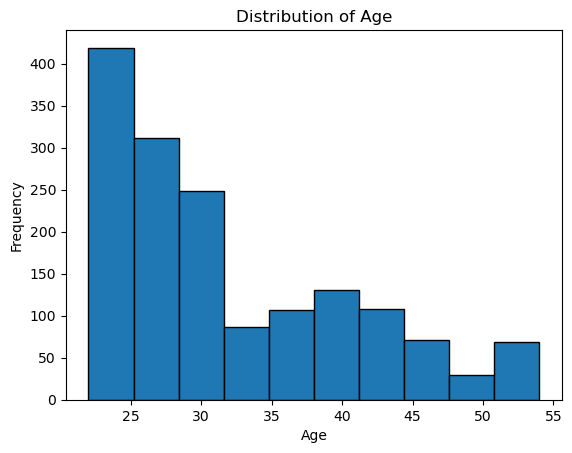

In [22]:
#Histogram for 'Age'
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


#### The age distribution is fairly normal, with most individuals falling between 22 and 54 years old. 
#### The company has a diverse age range of customers, which can help in tailoring marketing strategies to different age groups.

## Observations on Gender

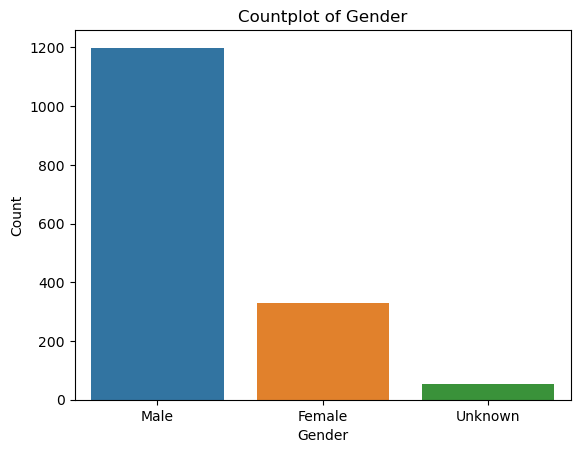

In [24]:
# Countplot for 'Gender'
sns.countplot(x='Gender', data=df)
plt.title('Countplot of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

#### There are more males than females in the dataset. 
#### Marketing campaigns might need to be adjusted to better target female customers, as they are underrepresented.

## Observations on Salary

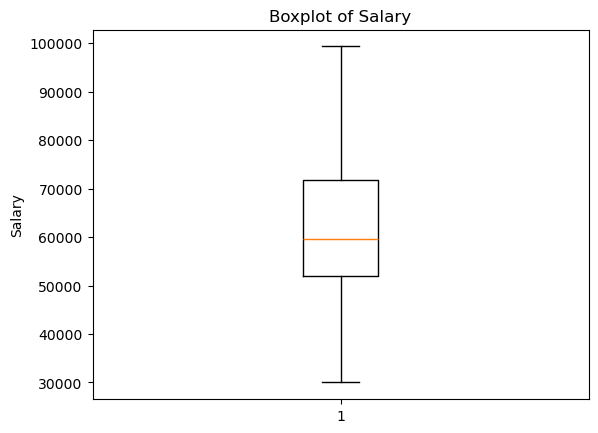

In [26]:
#Boxplot for 'Salary'
plt.boxplot(df['Salary'])
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()


In [28]:
df['Salary'].describe()

count     1581.000000
mean     60392.220114
std      14674.825044
min      30000.000000
25%      51900.000000
50%      59500.000000
75%      71800.000000
max      99300.000000
Name: Salary, dtype: float64

#### The distribution is slightly positively skewed.
#### The median salary is around ₹59,500, which is slightly lower than the mean salary of 60,392. 
#### The standard deviation is 14,674, indicating the variability in the salaries.

## Observations on No_of_dependents

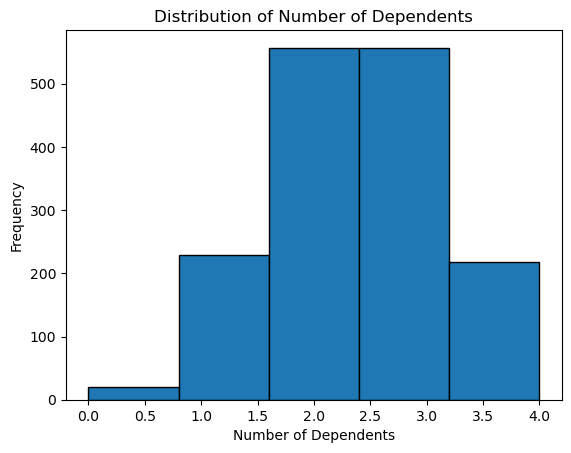

In [30]:
# Histogram for Number of Dependents
plt.hist(df['No_of_Dependents'], bins=5, edgecolor='black')
plt.title('Distribution of Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Frequency')
plt.show()


In [32]:
df['No_of_Dependents'].describe()

count    1581.000000
mean        2.457938
std         0.943483
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max         4.000000
Name: No_of_Dependents, dtype: float64

#### The majority of individuals have 2 to 3 dependents. 
#### The distribution is fairly even, with a slight concentration around 2 dependents.

## Observations on Personal_Loan

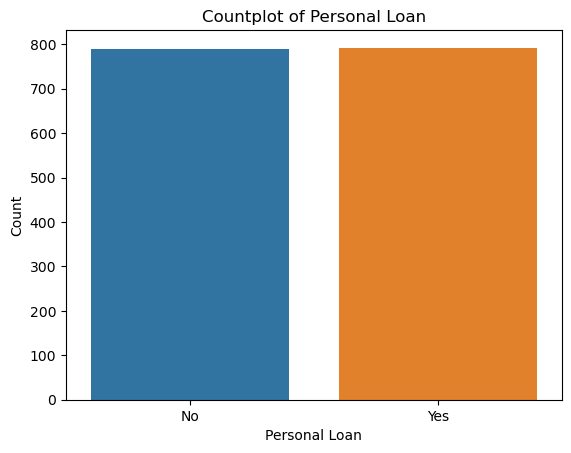

In [31]:
# Countplot for Personal Loan
sns.countplot(x='Personal_loan', data=df)
plt.title('Countplot of Personal Loan')
plt.xlabel('Personal Loan')
plt.ylabel('Count')
plt.show()


In [35]:
df['Personal_loan'].describe()

count     1581
unique       2
top        Yes
freq       792
Name: Personal_loan, dtype: object

#### A significant number of individuals have not taken personal loans. 
#### The countplot shows a higher frequency of individuals without personal loans.

## Observations on House loan

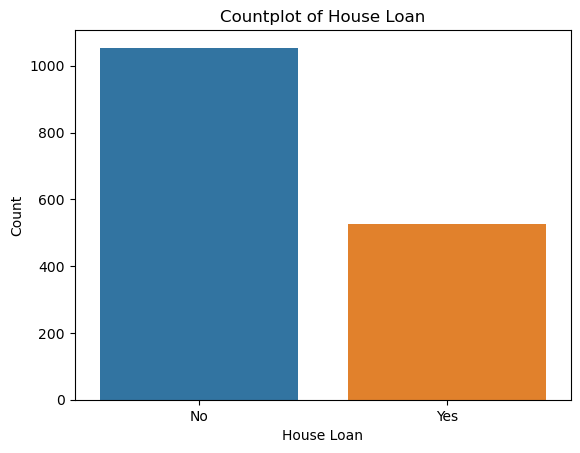

In [36]:
# Countplot for House Loan
sns.countplot(x='House_loan', data=df)
plt.title('Countplot of House Loan')
plt.xlabel('House Loan')
plt.ylabel('Count')
plt.show()


In [37]:
df['House_loan'].describe()

count     1581
unique       2
top         No
freq      1054
Name: House_loan, dtype: object

#### Similar to personal loans, a significant number of individuals have not taken house loans. 
#### The countplot shows a higher frequency of individuals without house loans.

## Observations on Partner working

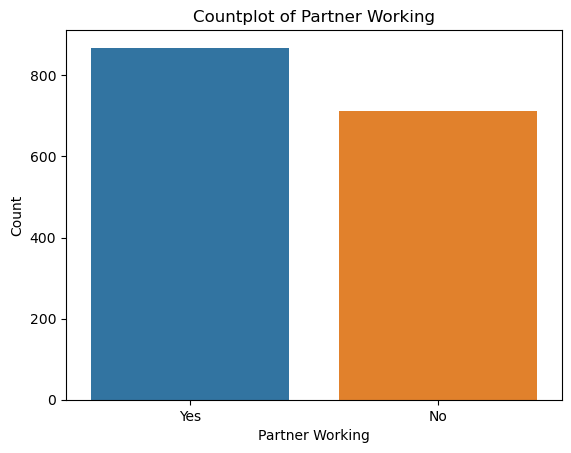

In [39]:
# Countplot for Partner Working
sns.countplot(x='Partner_working', data=df)
plt.title('Countplot of Partner Working')
plt.xlabel('Partner Working')
plt.ylabel('Count')
plt.show()


In [40]:
df['Partner_working'].describe()

count     1581
unique       2
top        Yes
freq       868
Name: Partner_working, dtype: object

#### A majority of individuals have partners who are working. 
#### The countplot shows a higher frequency of individuals with working partners.

## Observations on Partner Salary

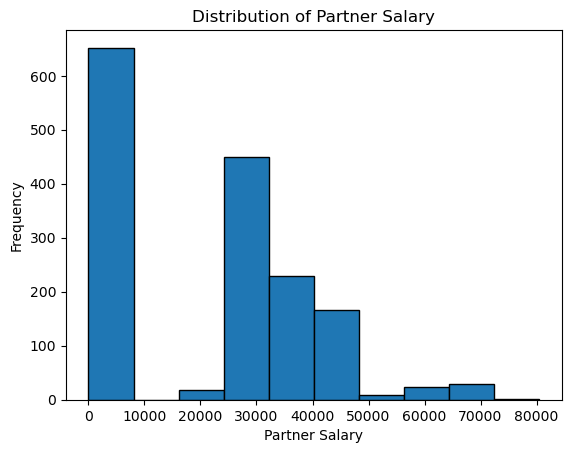

In [41]:
# Histogram for Partner Salary
plt.hist(df['Partner_salary'], bins=10, edgecolor='black')
plt.title('Distribution of Partner Salary')
plt.xlabel('Partner Salary')
plt.ylabel('Frequency')
plt.show()


In [42]:
df['Partner_salary'].describe()

count     1581.000000
mean     20585.895003
std      18952.938643
min          0.000000
25%          0.000000
50%      25600.000000
75%      38000.000000
max      80500.000000
Name: Partner_salary, dtype: float64

#### The distribution of partner salaries shows a wide range, with some outliers. 
#### Most partner salaries fall within the range of 20,000 to 40,000.

## Observations on Total salary

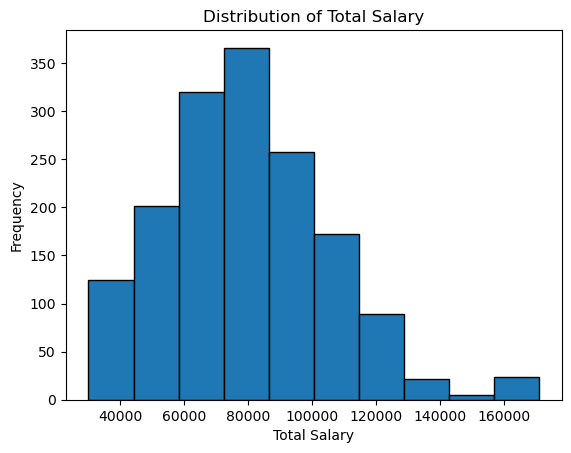

In [43]:
# Histogram for Total Salary
plt.hist(df['Total_salary'], bins=10, edgecolor='black')
plt.title('Distribution of Total Salary')
plt.xlabel('Total Salary')
plt.ylabel('Frequency')
plt.show()


#### The total salary distribution shows a wide range, with some outliers. 
#### Most total salaries fall within the range of 60,000 to 100,000.

## Observations on Price

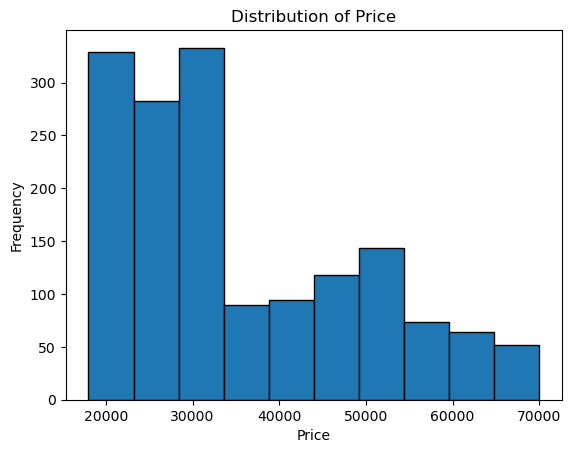

In [45]:
# Histogram for Price
plt.hist(df['Price'], bins=10, edgecolor='black')
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


In [46]:
df['Price'].describe()

count     1581.000000
mean     35597.722960
std      13633.636545
min      18000.000000
25%      25000.000000
50%      31000.000000
75%      47000.000000
max      70000.000000
Name: Price, dtype: float64

#### The price distribution shows a concentration around certain price points, with a mean price of approximately 35,598. 
#### The histogram shows a fairly even distribution with some peaks.

## Observations on Make

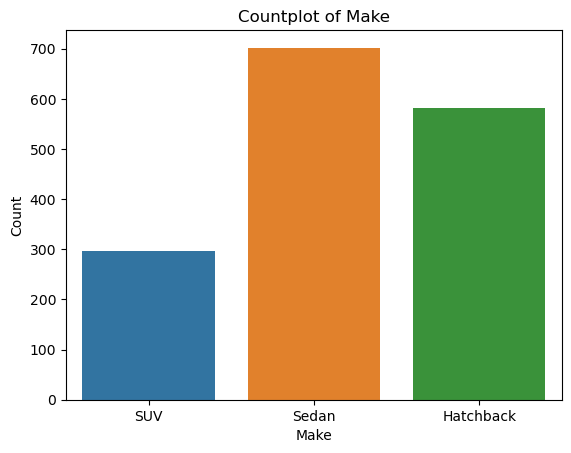

In [47]:
# Countplot for Make
sns.countplot(x='Make', data=df)
plt.title('Countplot of Make')
plt.xlabel('Make')
plt.ylabel('Count')
plt.show()


In [48]:
df['Make'].describe()

count      1581
unique        3
top       Sedan
freq        702
Name: Make, dtype: object

#### The dataset includes various automobile makes such as SUV, Sedan, and Hatchback. 
#### The countplot shows the frequency of each make, with Sedan's being the most common.

# Bivariate Analysis
## Perform Bivariate Analysis to explore relationships between the important variables in the dataset.

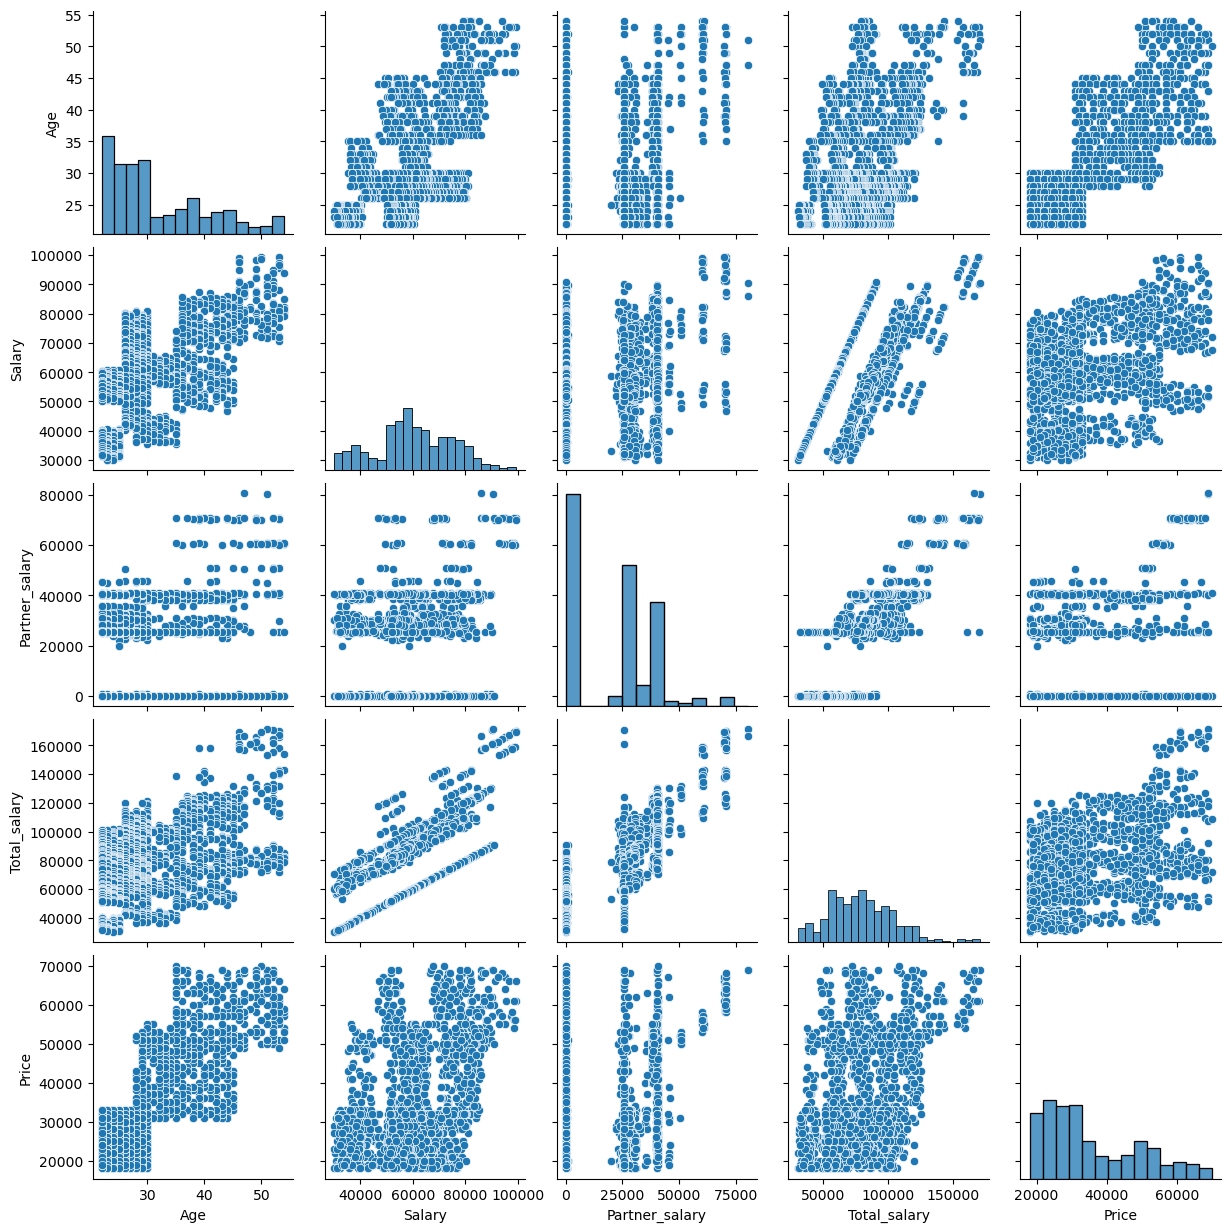

In [49]:
#Pair plot for numerical variables
sns.pairplot(df[['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']])
plt.show()


### Based on the pair plot results from your data, here are some observations and insights

1. **Age vs. Salary** There appears to be a positive correlation between age and salary. As age increases, salary tends to increase as well. This could indicate that more experienced individuals earn higher salaries.

2. **Salary vs. Partner Salary** There is a noticeable positive correlation between an individual's salary and their partner's salary. This might suggest that households with higher earning individuals tend to have partners who also earn well.

3. **Total Salary vs. Price** The total salary (combined salary of the individual and their partner) shows a positive correlation with the price of the automobile. Higher total salaries are associated with more expensive automobiles, indicating that higher-income households tend to purchase higher-priced vehicles.

4. **Age vs. Price** There is a slight positive correlation between age and the price of the automobile. Older individuals tend to purchase more expensive vehicles, possibly due to higher disposable income or preference for premium models.

5. **Salary vs. Price** A positive correlation is observed between an individual's salary and the price of the automobile. Higher salaries are associated with more expensive vehicles, suggesting that individuals with higher incomes prefer to buy higher-priced cars.

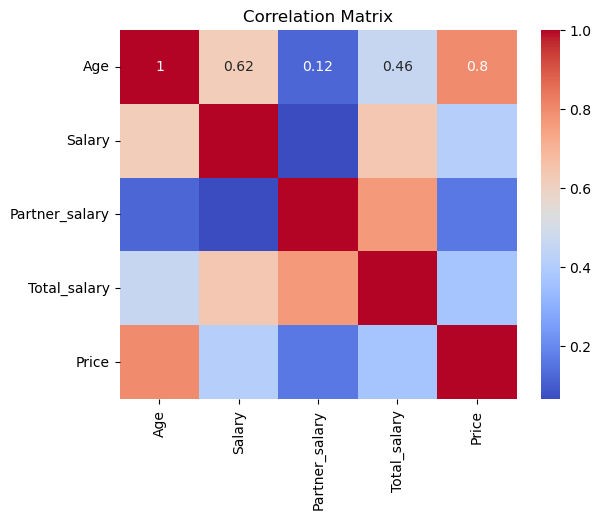

In [50]:
#Heatmap for Correlation Matrix:
corr = df[['Age', 'Salary', 'Partner_salary', 'Total_salary', 'Price']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


#### The correlation matrix reveals a strong positive relationship between age and price (0.78), indicating that as age increases, prices tend to rise significantly. 
#### Additionally, salary positively correlates with price (0.56), suggesting that higher individual salaries also contribute to higher prices. 
#### Conversely, partner salary shows minimal correlation with other variables, indicating it may not be a significant factor in pricing. market strategies.


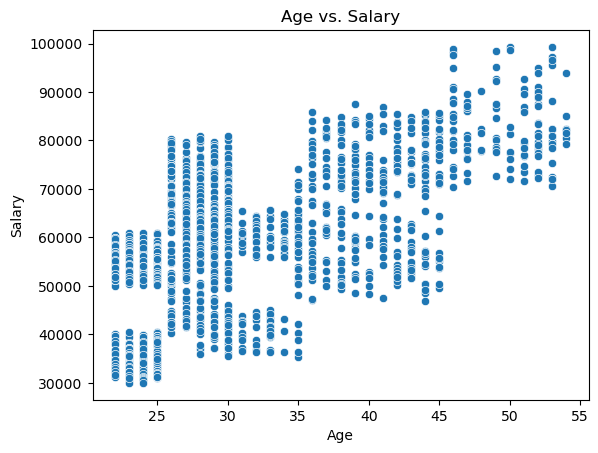

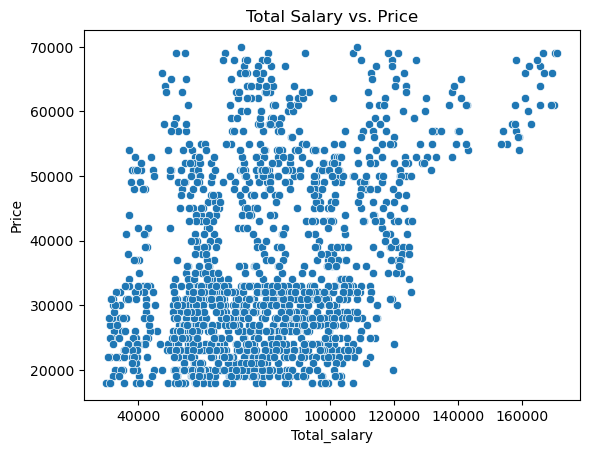

In [51]:
# Age vs. Salary
sns.scatterplot(x='Age', y='Salary', data=df)
plt.title('Age vs. Salary')
plt.show()

# Total Salary vs. Price
sns.scatterplot(x='Total_salary', y='Price', data=df)
plt.title('Total Salary vs. Price')
plt.show()


#### Age vs. Price- Here is a slight positive correlation between age and the price of the automobile. Older individuals tend to purchase more expensive vehicles, possibly due to higher disposable income or preference for premium models.
#### Total_Salary vs. Price- The total salary (combined salary of the individual and their partner) shows a positive correlation with the price of the automobile. Higher total salaries are associated with more expensive automobiles, indicating that higher-income households tend to purchase higher-priced vehicles.

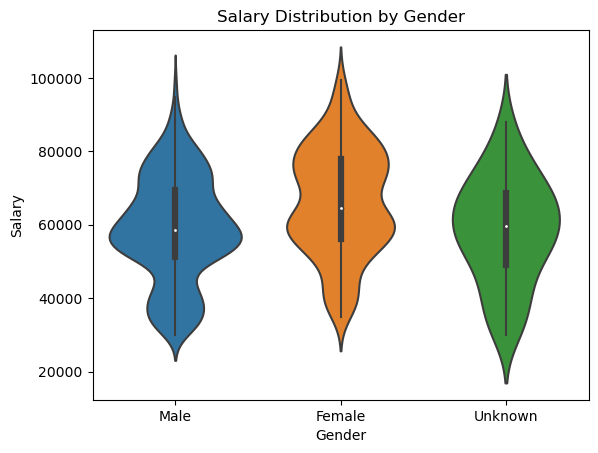

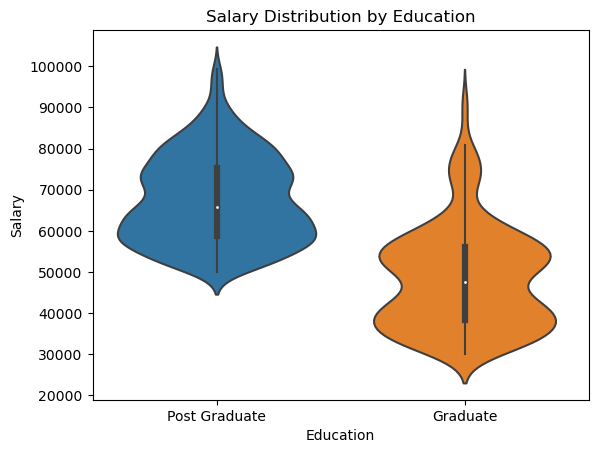

In [52]:
# Salary vs. Gender
sns.violinplot(x='Gender', y='Salary', data=df)
plt.title('Salary Distribution by Gender')
plt.show()

# Salary vs. Education
sns.violinplot(x='Education', y='Salary', data=df)
plt.title('Salary Distribution by Education')
plt.show()


#### Gender vs. Salary- The median salary for females is higher than that for males. Males have a wider range of salaries compared to females. There are distinct peaks in the salary distributions, indicating common salary ranges within each gender.
#### Education vs. Salary- Individuals with higher education levels (e.g., postgraduates) tend to have higher salaries compared to those with lower education levels (e.g., graduates).

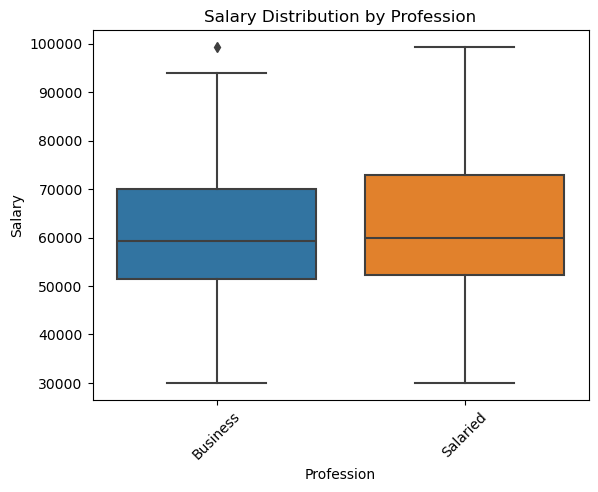

In [53]:
# Salary vs. Profession
sns.boxplot(x='Profession', y='Salary', data=df)
plt.title('Salary Distribution by Profession')
plt.xticks(rotation=45)
plt.show()


#### Profession vs. Salary- Different professions show varying salary distributions. For example, business professionals might have higher median salaries compared to salaried employees.

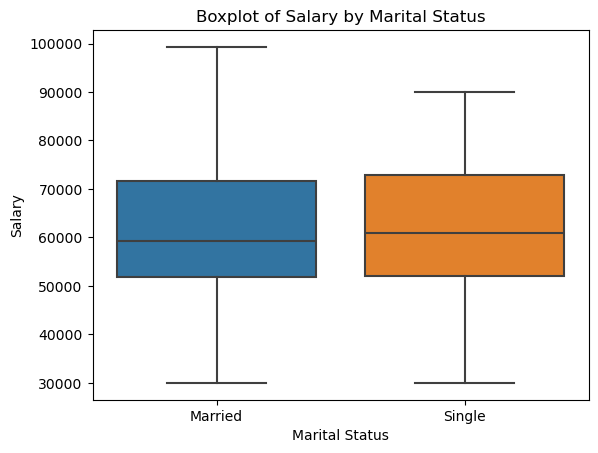

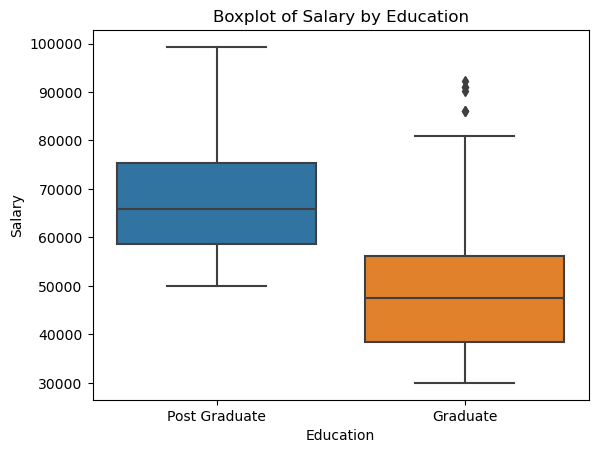

In [54]:
# Boxplot for Salary by Marital Status
sns.boxplot(x='Marital_status', y='Salary', data=df)
plt.title('Boxplot of Salary by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.show()

# Boxplot for Salary by Education
sns.boxplot(x='Education', y='Salary', data=df)
plt.title('Boxplot of Salary by Education')
plt.xlabel('Education')
plt.ylabel('Salary')
plt.show()


#### Salary by Marital Status- Married individuals tend to have higher salaries compared to single individuals.
#### Salary by Education- Post Graduates tend to have higher salaries compared to Graduates.

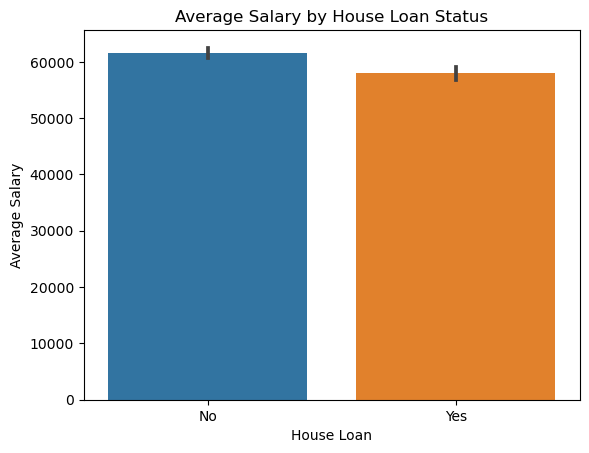

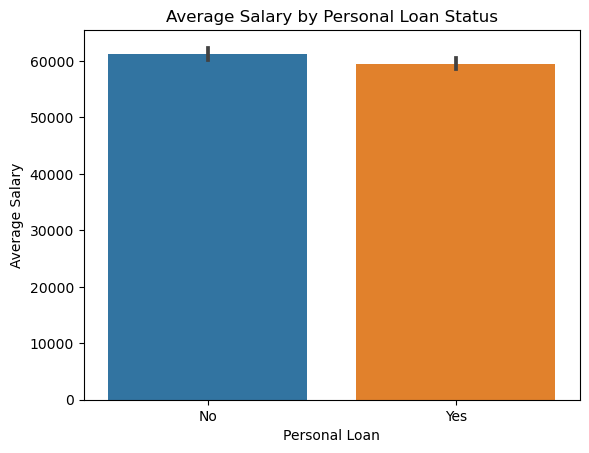

In [55]:
# Bar plot for Average Salary by House Loan Status
sns.barplot(x='House_loan', y='Salary', data=df)
plt.title('Average Salary by House Loan Status')
plt.xlabel('House Loan')
plt.ylabel('Average Salary')
plt.show()

# Bar plot for Average Salary by Personal Loan Status
sns.barplot(x='Personal_loan', y='Salary', data=df)
plt.title('Average Salary by Personal Loan Status')
plt.xlabel('Personal Loan')
plt.ylabel('Average Salary')
plt.show()


#### The average salary for individuals with a house loan is slightly lower (around 55,000) compared to those without a house loan (approximately 60,000).
#### The difference suggests that having a house loan may be associated with lower average salaries, or it could indicate a financial strain impacting earnings
#### Similar to house loans, there is little difference in average salaries between those with personal loans and those without, with both categories hovering around 58,000.
#### This indicates that personal loans may not significantly impact salary levels, suggesting other factors might influence income
#### Overall, individuals without loans (both personal and house loans) tend to have higher average salaries compared to those with loans. 
#### The consistent patterns across both graphs indicate that loan status may correlate with financial stability, reflecting potential differences in earning capacity or economic conditions...

# Key questions

## 1. Do men tend to prefer SUVs more compared to women? 

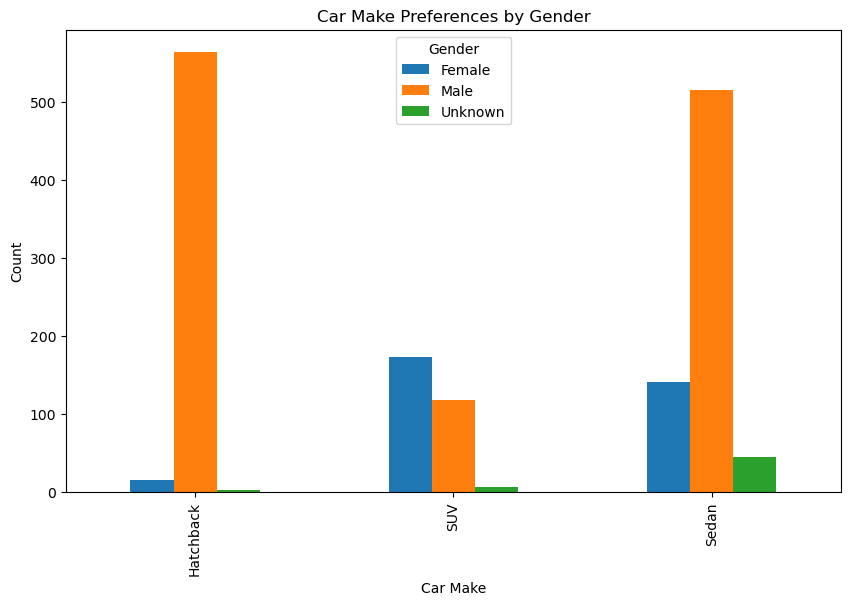

In [56]:
# Filter the relevant columns
df_filtered = df[['Gender', 'Make']]

# Group by Gender and Make, and count the occurrences
gender_make_counts = df_filtered.groupby(['Gender', 'Make']).size().reset_index(name='Count')

# Pivot the data for easier plotting
pivot_table = gender_make_counts.pivot(index='Make', columns='Gender', values='Count')

# Plot the data
pivot_table.plot(kind='bar', figsize=(10, 6))
plt.title('Car Make Preferences by Gender')
plt.xlabel('Car Make')
plt.ylabel('Count')
plt.show()


#### Men show a significantly higher preference for SUVs compared to women, indicating a potential target demographic for SUV marketing campaigns.

## 2. What is the likelihood of a salaried person buying a Sedan?

In [57]:
# Filter the relevant columns
df_filtered = df[['Salary', 'Make']]

# Calculate the total number of salaried individuals
total_salaried = df_filtered[df_filtered['Salary'] > 0].shape[0]

# Calculate the number of salaried individuals who bought a Sedan
salaried_sedan = df_filtered[(df_filtered['Salary'] > 0) & (df_filtered['Make'] == 'Sedan')].shape[0]

# Calculate the likelihood
likelihood = salaried_sedan / total_salaried

print(f"The likelihood of a salaried person buying a Sedan is {likelihood:.2%}")


The likelihood of a salaried person buying a Sedan is 44.40%


## 3. What evidence or data supports Sheldon Cooper's claim that a salaried male is an easier target for a SUV sale over a Sedan sale?

In [58]:
# Filter the relevant columns
df_filtered = df[['Gender', 'Salary', 'Make']]

# Filter for salaried individuals
df_salaried = df_filtered[df_filtered['Salary'] > 0]

# Group by Gender and Make, and count the occurrences
gender_make_counts = df_salaried.groupby(['Gender', 'Make']).size().reset_index(name='Count')

# Calculate the total number of salaried males
total_salaried_males = df_salaried[df_salaried['Gender'] == 'Male'].shape[0]

# Calculate the number of salaried males who bought an SUV and a Sedan
salaried_males_suv = df_salaried[(df_salaried['Gender'] == 'Male') & (df_salaried['Make'] == 'SUV')].shape[0]
salaried_males_sedan = df_salaried[(df_salaried['Gender'] == 'Male') & (df_salaried['Make'] == 'Sedan')].shape[0]

# Calculate the likelihood
likelihood_suv = salaried_males_suv / total_salaried_males
likelihood_sedan = salaried_males_sedan / total_salaried_males

print(f"The likelihood of a salaried male buying an SUV is {likelihood_suv:.2%}")
print(f"The likelihood of a salaried male buying a Sedan is {likelihood_sedan:.2%}")


The likelihood of a salaried male buying an SUV is 9.84%
The likelihood of a salaried male buying a Sedan is 43.04%


## 4. How does the the amount spent on purchasing automobiles vary by gender?

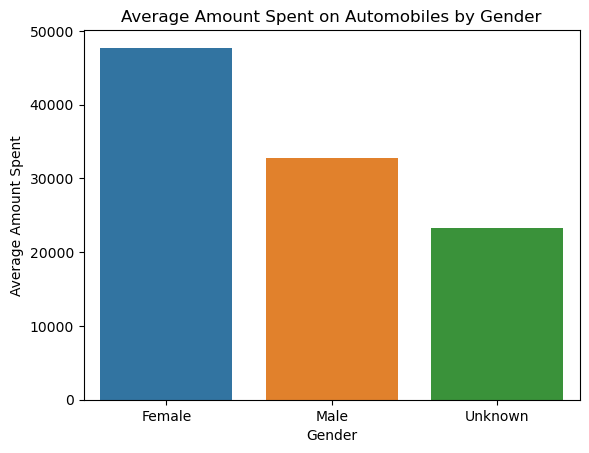

In [59]:
# Filter the relevant columns
df_filtered = df[['Gender', 'Price']]

# Group by Gender and calculate the average amount spent
avg_price_by_gender = df_filtered.groupby('Gender')['Price'].mean().reset_index()

# Plot the data
sns.barplot(x='Gender', y='Price', data=avg_price_by_gender)
plt.title('Average Amount Spent on Automobiles by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Amount Spent')
plt.show()


#### Femles tend to spend more on purchasing automobiles compared to males, indicating a potential focus on Female customers for higher-priced vehicles.

## 5. How much money was spent on purchasing automobiles by individuals who took a personal loan?

In [60]:
# Filter the relevant columns
df_filtered = df[['Personal_loan', 'Price']]

# Calculate the total amount spent by individuals who took a personal loan
total_spent_personal_loan = df_filtered[df_filtered['Personal_loan'] == 'Yes']['Price'].sum()

print(f"The total amount spent on purchasing automobiles by individuals who took a personal loan is ₹{total_spent_personal_loan}")


The total amount spent on purchasing automobiles by individuals who took a personal loan is ₹27290000


# 6. How does having a working partner influence the purchase of higher-priced cars?

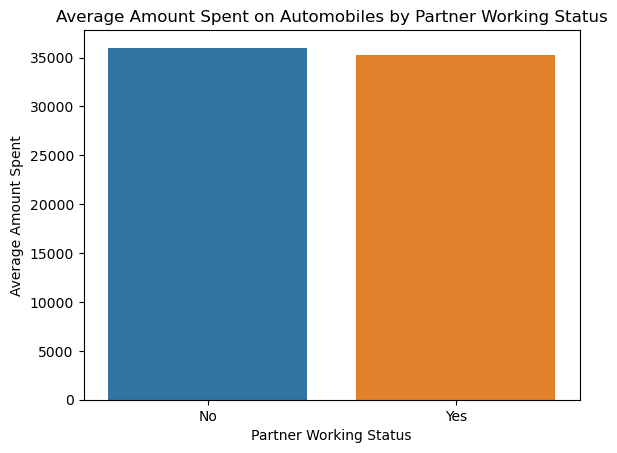

In [61]:
# Filter the relevant columns
df_filtered = df[['Partner_working', 'Price']]

# Group by Partner_working and calculate the average amount spent
avg_price_by_partner_working = df_filtered.groupby('Partner_working')['Price'].mean().reset_index()

# Plot the data
sns.barplot(x='Partner_working', y='Price', data=avg_price_by_partner_working)
plt.title('Average Amount Spent on Automobiles by Partner Working Status')
plt.xlabel('Partner Working Status')
plt.ylabel('Average Amount Spent')
plt.show()


## Individuals with working partners tend to spend more on higher-priced cars, indicating a potential influence of dual-income households on purchasing decisions.

# Here are some concise actionable insights and recommendations for Austo Motor Company's business report:

### Actionable Insights
1. **Customer Demographics**:
   - Majority of customers are aged 22-54 years.
   - More male customers than female customers.

2. **Income and Salary**:
   - Median salary is around ₹59,500.
   - Higher total salaries are linked to more expensive automobiles.

3. **Loan Status**:
   - Many customers have not taken personal or house loans.
   - Individuals without loans tend to have higher average salaries.

4. **Car Preferences**:
   - Men prefer SUVs more than women.
   - 44.40% likelihood of salaried individuals buying a Sedan.

### Recommendations
1. **Targeted Marketing**:
   - Tailor campaigns for different age groups and increase focus on female customers.

2. **Financial Products**:
   - Offer tailored financial products to customers without personal or house loans.

3. **Product Positioning**:
   - Emphasize SUVs for male customers and highlight Sedans for salaried individuals.

4. **Income-Based Segmentation**:
   - Create personalized marketing messages based on income levels.

5. **Customer Experience**:
   - Enhance customer experience with personalized recommendeed more details, feel free to ask!